In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv("2025-12-02_14-52-26-546.csv")
df

,CH1,CH3,CH4,time,Ts
0,-11.899219,12.596875,-5.600000,0.000000e+00,4.000000e-09
1,-11.700000,12.200000,-4.003125,4.000000e-09,NaN
2,-11.700781,12.601562,-4.806250,8.000000e-09,NaN
3,-11.900000,12.806250,-5.596875,1.200000e-08,NaN
4,-11.702344,12.195312,-6.000000,1.600000e-08,NaN
...,...,...,...,...,...
9995,-11.900000,13.000000,-4.400000,3.998000e-05,NaN
9996,-11.700000,11.996875,-4.793750,3.998400e-05,NaN
9997,-11.899219,12.398438,-6.006250,3.998800e-05,NaN
9998,-11.900000,12.400000,-6.006250,3.999200e-05,NaN


In [3]:
vout= df.CH1.values
vgs= df.CH3.values
vds= df.CH4.values
Ts = df.Ts.iloc[0]
time = np.arange(0,Ts*len(df), Ts)

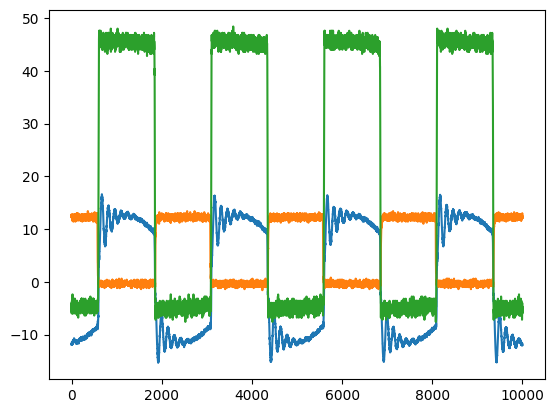

In [4]:
plt.plot(vout)
plt.plot(vgs)
plt.plot(vds)

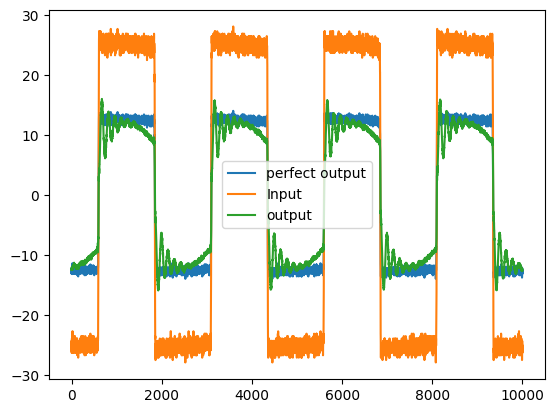

In [5]:


plt.plot(2*(vds-vds.mean())/4, label = "perfect output")
plt.plot(vds-vds.mean(), label = "Input")
plt.plot(vout-vout.mean(), label = "output")
plt.legend()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df =pd.read_csv("2025-12-02_15-15-48-845.csv")
df

,CH1,CH2,CH3,time,Ts
0,-12.001563,0.049844,32.700000,0.000000e+00,4.000000e-09
1,-11.800000,0.060234,32.700000,4.000000e-09,NaN
2,-12.000781,0.030000,32.796875,8.000000e-09,NaN
3,-11.900781,0.060000,32.594531,1.200000e-08,NaN
4,-11.800781,0.040859,33.201563,1.600000e-08,NaN
...,...,...,...,...,...
9995,-11.800000,0.040000,32.900000,3.998000e-05,NaN
9996,-11.900000,0.029922,32.500000,3.998400e-05,NaN
9997,-11.700000,0.049922,32.800000,3.998800e-05,NaN
9998,-12.100000,0.020000,32.600000,3.999200e-05,NaN


In [8]:
vout= df.CH1.values
Idpl= df.CH2.values
vcr= df.CH3.values
Ts = df.Ts.iloc[0]
time = np.arange(0,Ts*len(df), Ts)

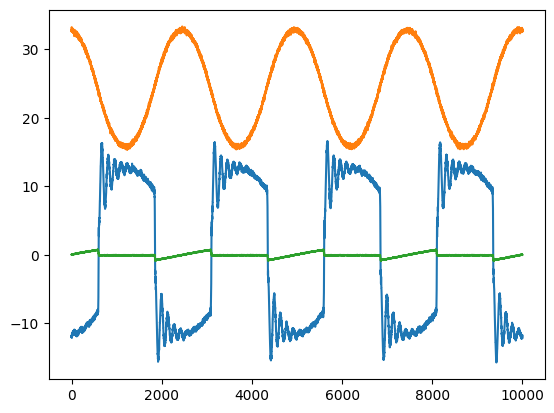

In [9]:
plt.plot(vout)
plt.plot(vcr)
plt.plot(Idpl)

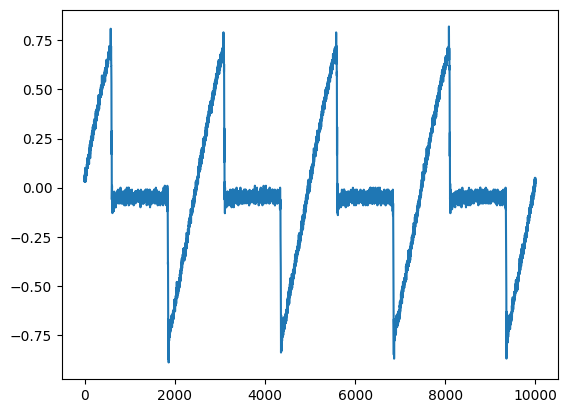

In [10]:
plt.plot(Idpl)

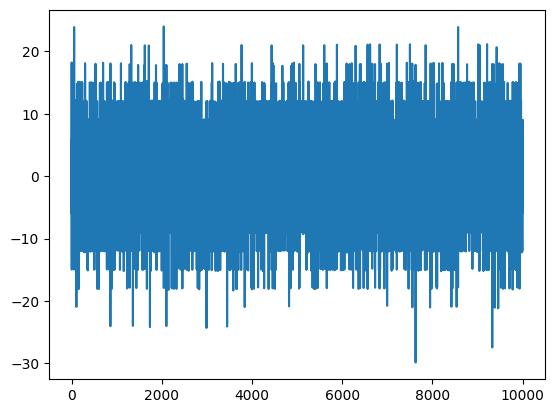

In [44]:
# ic = C dv/dt7
Cr= 15e-9*8
ic = Cr*np.diff(vcr)/Ts
plt.plot(ic)

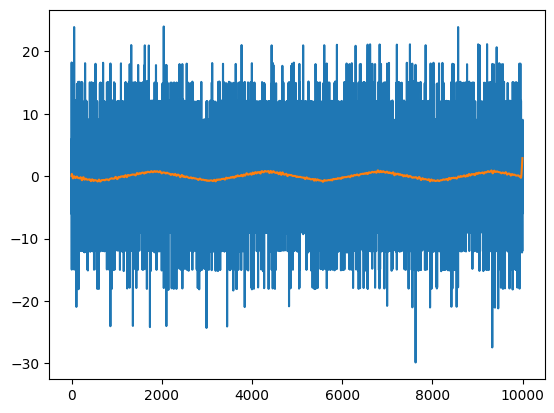

In [61]:
import numpy as np
from scipy.signal import butter, filtfilt

def lowpass_zero_delay(x, fc, Ts, order=4):
    fs = 1.0 / Ts                 # sampling frequency
    nyq = fs / 2.0                # Nyquist
    Wn = fc / nyq                 # normalized cutoff 0–1

    # Butterworth low-pass
    b, a = butter(order, Wn, btype='low')

    # zero-phase filtering
    y = filtfilt(b, a, x)

    return y
plt.plot(ic)
icf = lowpass_zero_delay(x=ic, fc=5e6, Ts=Ts, order=4)
plt.plot(icf)

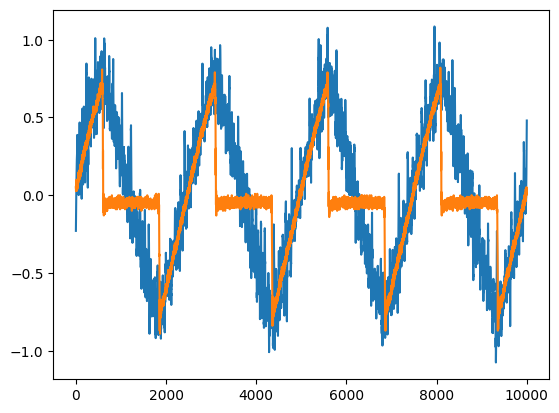

In [64]:
from scipy.signal import savgol_filter

# Window size: Must be odd. Larger = smoother but less responsive to fast changes
# Poly order: 2 or 3 is usually good for physical signals
window_length = 51 
poly_order = 3

# deriv=1 calculates the 1st derivative (dv/dt) directly
dv_dt_smooth = savgol_filter(vcr, window_length, poly_order, deriv=1, delta=Ts)

ic_smooth = Cr * dv_dt_smooth
#plt.plot(ic)
plt.plot(-ic_smooth, label='Savitzky-Golay')
plt.plot(Idpl)

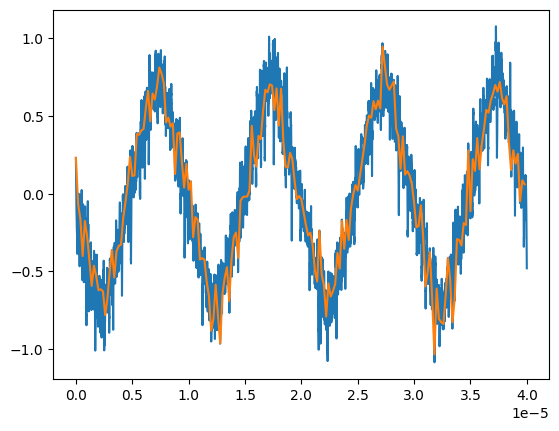

In [69]:
plt.plot(time, ic_smooth) 
plt.plot(time[::50], ic_smooth[::50])

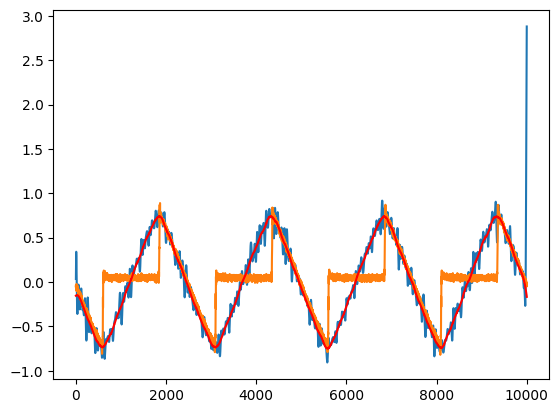

In [63]:
from scipy.signal import savgol_filter

# Window size: Must be odd. Larger = smoother but less responsive to fast changes
# Poly order: 2 or 3 is usually good for physical signals
window_length = 500
poly_order = 5

# deriv=1 calculates the 1st derivative (dv/dt) directly
dv_dt_smooth = savgol_filter(vcr, window_length, poly_order, deriv=1, delta=Ts)

ic_smooth = Cr * dv_dt_smooth
#plt.plot(ic)


plt.plot(icf)
plt.plot(-Idpl)
plt.plot(ic_smooth, label='Savitzky-Golay', c="r")


# solve diff equation

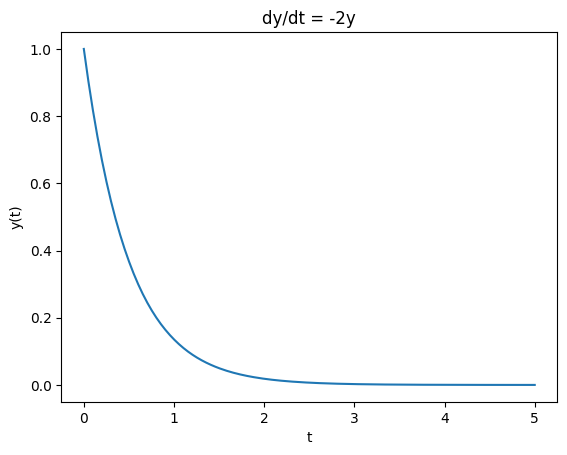

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ODE function
def dydt(t, y):
    # dy/dt =-2y
    return -2 * y

# Solve on interval t ∈ [0, 5]
solution = solve_ivp(dydt, [0, 5], [1], t_eval=np.linspace(0, 5, 200))

# Plot
plt.plot(solution.t, solution.y[0])
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("dy/dt = -2y")
plt.show()


In [34]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

rs = 0.01
Cr = 120e-9
rsCr = rs * Cr

# turn the measured 1D vcr array into a callable function vcr(t)
vcrf = interp1d(time, vcr, kind="linear", fill_value="extrapolate")

def dvcdt(t, vc):
    return (vcrf(t) - vc) / rsCr

solution = solve_ivp(dvcdt, [time[0], time[-1]], [0], t_eval=time)


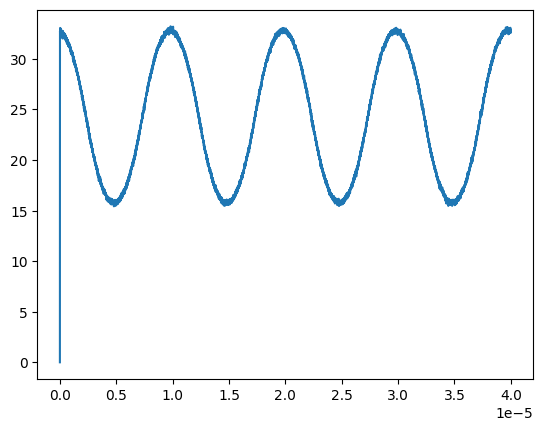

In [37]:
vc =  solution.y[0]
time2=solution.t
plt.plot(time2,vc)


(-100.0, 100.0)

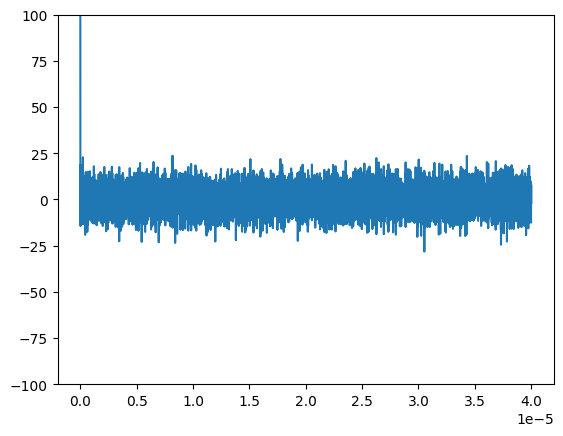

In [43]:
ic = Cr*dvcdt(t=time2, vc=vc)
plt.plot(time2, ic)
plt.ylim([-100,100])

(np.float64(0.0), np.float64(3.9996e-05))